In [1]:
from google.colab import files
uploaded = files.upload()

Saving fraud_data.csv to fraud_data.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
data = pd.read_csv('fraud_data.csv')

In [4]:
data.shape

(14446, 15)

In [5]:
data.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,04-01-2019 00:58,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1
1,04-01-2019 15:06,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1
2,04-01-2019 22:37,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1
3,04-01-2019 23:06,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1
4,04-01-2019 23:59,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1


In [17]:
data.drop(columns=['merchant','category','city','state','job','trans_num'],inplace = True)

In [18]:
data.isnull().sum()

,0
trans_date_trans_time,0
amt,0
lat,0
long,0
city_pop,0
dob,0
merch_lat,0
merch_long,0
is_fraud,0


In [19]:
data.duplicated().sum()

63

In [20]:
data[data.duplicated()]

,trans_date_trans_time,amt,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud
8725,04-01-2019 00:58,14.37,64.7556,-165.6723,145,09-11-1939,65.654142,-164.722603,1
8857,04-01-2019 15:06,966.11,64.7556,-165.6723,145,09-11-1939,65.468863,-165.473127,1
8964,04-01-2019 22:37,49.61,64.7556,-165.6723,145,09-11-1939,65.347667,-165.914542,1
8972,04-01-2019 23:06,295.26,64.7556,-165.6723,145,09-11-1939,64.445035,-166.080207,1
8982,04-01-2019 23:59,18.17,64.7556,-165.6723,145,09-11-1939,65.447094,-165.446843,1
...,...,...,...,...,...,...,...,...,...
13261,18-01-2019 14:38,21.54,38.9999,-109.6150,46,23-04-1987,38.211376,-109.986757,1
13372,18-01-2019 22:06,528.98,38.9999,-109.6150,46,23-04-1987,39.164469,-109.933543,1
13376,18-01-2019 22:12,21.23,38.9999,-109.6150,46,23-04-1987,38.998205,-110.005615,1
13392,18-01-2019 23:16,9.33,38.9999,-109.6150,46,23-04-1987,39.230640,-108.990363,1


In [21]:
data.drop_duplicates(inplace=True)

In [22]:
data.duplicated().sum()

0

In [23]:
data.shape

(14383, 9)

In [24]:
data.describe()

,amt,lat,long,city_pop,merch_lat,merch_long
count,14383.000000,14383.000000,14383.000000,1.438300e+04,14383.000000,14383.000000
mean,122.719068,39.761571,-110.835395,1.063921e+05,39.761755,-110.836186
std,228.879064,5.266532,12.877931,2.900439e+05,5.309190,12.887765
min,1.000000,20.027100,-165.672300,4.600000e+01,19.032689,-166.670685
25%,11.945000,36.715400,-120.282400,4.930000e+02,36.768908,-120.095775
50%,51.290000,39.666200,-111.098500,1.645000e+03,39.613766,-111.203646
75%,100.140000,41.940400,-101.136000,3.543900e+04,42.275391,-100.556920
max,3261.470000,66.693300,-89.628700,2.383912e+06,67.510267,-88.646366


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14383 entries, 0 to 14445
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  14383 non-null  object 
 1   amt                    14383 non-null  float64
 2   lat                    14383 non-null  float64
 3   long                   14383 non-null  float64
 4   city_pop               14383 non-null  int64  
 5   dob                    14383 non-null  object 
 6   merch_lat              14383 non-null  float64
 7   merch_long             14383 non-null  float64
 8   is_fraud               14383 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.1+ MB


In [26]:
data.dtypes

,0
trans_date_trans_time,object
amt,float64
lat,float64
long,float64
city_pop,int64
dob,object
merch_lat,float64
merch_long,float64
is_fraud,object


In [41]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'], format='mixed', dayfirst=True)

In [42]:
data['pdate_ordinal']= data['trans_date_trans_time'].apply(lambda date: date.toordinal())

In [43]:
data['dob'] = pd.to_datetime(data['dob'], format='mixed', dayfirst=True)

In [44]:
data['dob_ordinal']= data['dob'].apply(lambda date: date.toordinal())

In [51]:
data['is_fraud'].value_counts()

,count
is_fraud,
0,12600
1,1781
"1""2020-12-24 16:56:24""",1
"0""2019-01-01 00:00:44""",1


In [52]:
data['is_fraud'] = data['is_fraud'].replace('1"2020-12-24 16:56:24"',1)

In [55]:
data['is_fraud'] = data['is_fraud'].replace('0"2019-01-01 00:00:44"',0)

In [56]:
data['is_fraud'].value_counts()

,count
is_fraud,
0,12600
1,1781
1,1
0,1


In [57]:
data['is_fraud'] = pd.to_numeric(data['is_fraud']).astype('int64')

In [58]:
data['is_fraud'].value_counts()

,count
is_fraud,
0,12601
1,1782


In [60]:
data.drop(columns=['trans_date_trans_time','dob'],inplace = True)

In [61]:
data.dtypes

,0
amt,float64
lat,float64
long,float64
city_pop,int64
merch_lat,float64
merch_long,float64
is_fraud,int64
pdate_ordinal,int64
dob_ordinal,int64


In [62]:
data.head()

,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud,pdate_ordinal,dob_ordinal
0,14.37,64.7556,-165.6723,145,65.654142,-164.722603,1,737063,708152
1,966.11,64.7556,-165.6723,145,65.468863,-165.473127,1,737063,708152
2,49.61,64.7556,-165.6723,145,65.347667,-165.914542,1,737063,708152
3,295.26,64.7556,-165.6723,145,64.445035,-166.080207,1,737063,708152
4,18.17,64.7556,-165.6723,145,65.447094,-165.446843,1,737063,708152


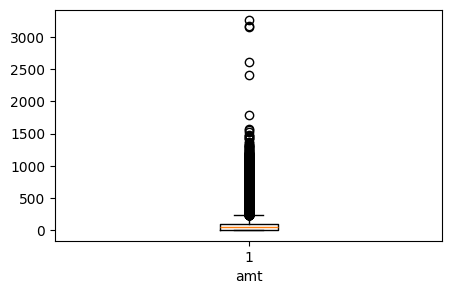

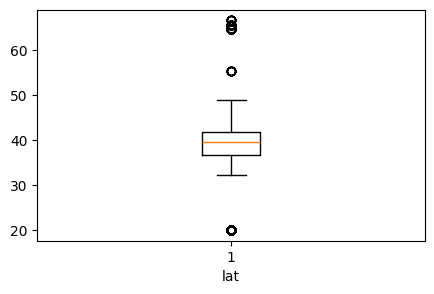

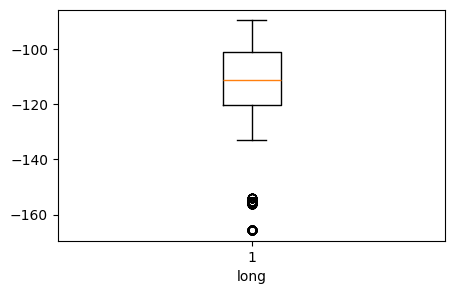

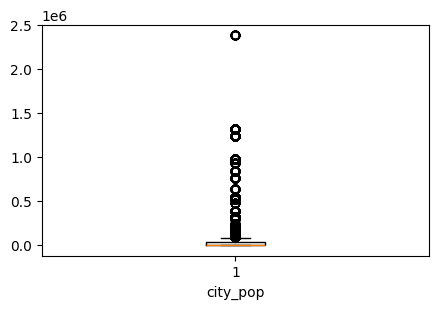

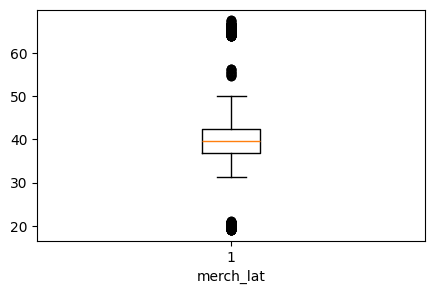

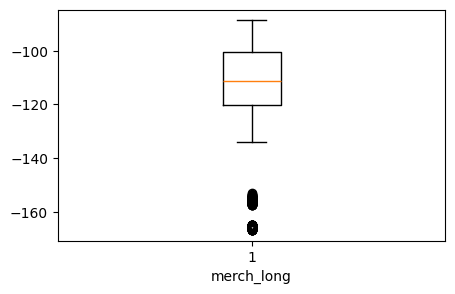

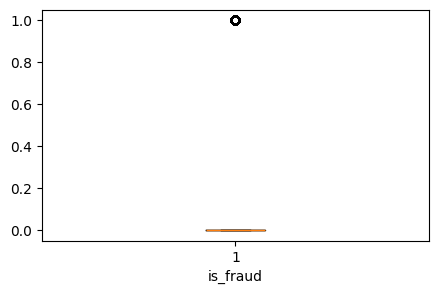

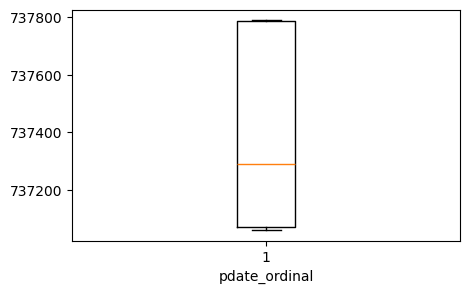

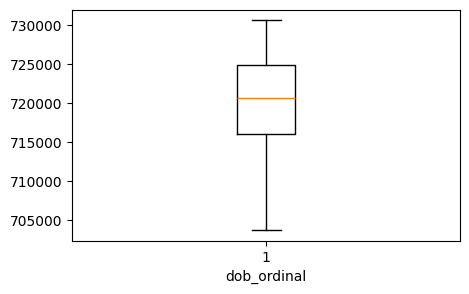

In [65]:
for i in data.columns:
  if data[i].dtypes != 'object':
    plt.figure(figsize=(5,3))
    plt.boxplot(data[i])
    plt.xlabel(i)
    plt.show()

In [66]:
for i in data.columns:
  if (data[i].dtypes != 'object'):
    p1 = data[i].quantile(0.01)
    p2 = data[i].quantile(0.99)
    data[i][data[i]<p1]=p1
    data[i][data[i]>p2]=p2

<ipython-input-66-3730eddc9199>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data[i][data[i]<p1]=p1
<ipython-input-66-3730eddc9199>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

In [67]:
data.corr()

,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud,pdate_ordinal,dob_ordinal
amt,1.000000,0.030880,-0.013767,0.011152,0.030271,-0.013432,0.675195,-0.010780,-0.047100
lat,0.030880,1.000000,-0.091183,-0.231178,0.993196,-0.092828,0.039223,-0.001290,-0.143202
long,-0.013767,-0.091183,1.000000,-0.071118,-0.099489,0.998959,-0.016478,-0.004798,0.079898
city_pop,0.011152,-0.231178,-0.071118,1.000000,-0.231928,-0.071020,0.009419,-0.014101,0.141445
merch_lat,0.030271,0.993196,-0.099489,-0.231928,1.000000,-0.101024,0.037139,-0.000150,-0.143852
merch_long,-0.013432,-0.092828,0.998959,-0.071020,-0.101024,1.000000,-0.016791,-0.003882,0.080102
is_fraud,0.675195,0.039223,-0.016478,0.009419,0.037139,-0.016791,1.000000,-0.009879,-0.060207
pdate_ordinal,-0.010780,-0.001290,-0.004798,-0.014101,-0.000150,-0.003882,-0.009879,1.000000,-0.006858
dob_ordinal,-0.047100,-0.143202,0.079898,0.141445,-0.143852,0.080102,-0.060207,-0.006858,1.000000


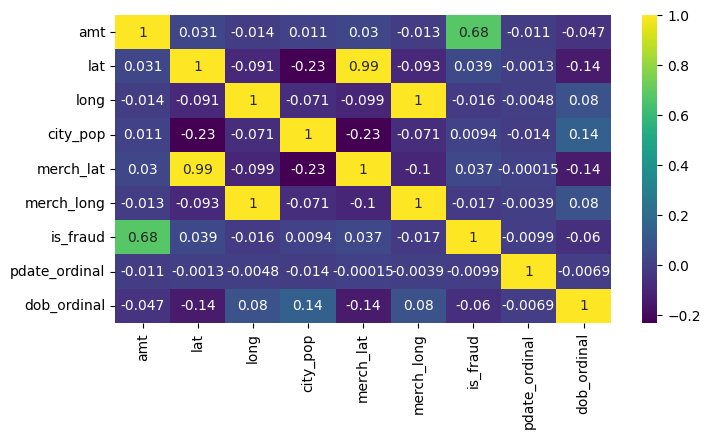

In [70]:
plt.figure(figsize=(8,4))
sns.heatmap(data.corr() , annot = True , cmap ='viridis' )
plt.show()

In [71]:
X = data.drop(columns = 'is_fraud')
y = data['is_fraud']

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2 , random_state = 42)

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [76]:
X_train

array([[-0.50845889, -1.17918894, -0.60351314, ..., -0.63901681,
         1.09044851,  1.36928035],
       [-0.31453286, -0.02218805,  0.45449319, ...,  0.46426384,
         1.10210281,  0.21903192],
       [-0.04333079,  0.23702851,  1.15626306, ...,  1.15444349,
        -0.96653523, -1.16503542],
       ...,
       [-0.33527779,  0.02122162, -0.78516337, ..., -0.80150066,
         1.09627566, -0.25802891],
       [ 0.68729566,  1.61893339, -0.91690576, ..., -0.87386007,
        -0.05167278, -0.84720782],
       [-0.12115879,  0.0641225 , -0.7976978 , ..., -0.82489725,
         1.10501638, -0.3314966 ]])

In [77]:
X_test

array([[-0.12115879,  1.68047621, -0.48607316, ..., -0.54347997,
        -0.98401668, -0.83874306],
       [ 0.50675494,  1.58517032, -0.89379515, ..., -0.85111641,
         1.09627566,  0.71973017],
       [-0.49134777, -0.11543844,  1.29907318, ...,  1.30388395,
        -0.99275741,  1.22985146],
       ...,
       [-0.49820142,  1.58517032, -0.89379515, ..., -0.85801103,
         1.09044851,  0.71973017],
       [-0.49774144, -0.41307855, -0.93084348, ..., -0.98822661,
        -0.97236238,  1.16277227],
       [-0.10041386,  1.78485885, -0.91946656, ..., -0.84843445,
         1.10501638,  0.13789804]])

In [78]:
log_reg= LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [79]:
y_predq = log_reg.predict(X_test)
y_predq

array([0, 0, 0, ..., 0, 0, 0])

In [81]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predq)

0.9204031977754605

In [82]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predq))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2503
           1       0.84      0.48      0.61       374

    accuracy                           0.92      2877
   macro avg       0.89      0.73      0.78      2877
weighted avg       0.92      0.92      0.91      2877



In [83]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_predq)

0.7313758249458939

In [93]:
from sklearn.metrics import confusion_matrix
c = confusion_matrix(y_test,y_predq)

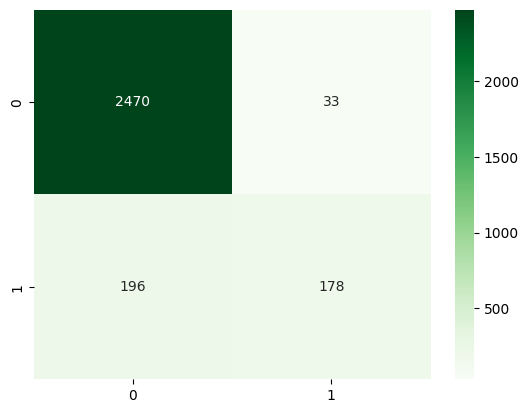

In [94]:
sns.heatmap(c , cmap = 'Greens', annot = True, fmt = 'd')
plt.show()

*DecisionTreeClassifier*

In [85]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(random_state = 42)
dec_tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [86]:
y_predd = dec_tree.predict(X_test)
y_predd

array([0, 0, 0, ..., 0, 0, 0])

In [87]:
accuracy_score(y_test,y_predd)

0.9961765728189086

In [88]:
print(classification_report(y_test,y_predd))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2503
           1       0.98      0.99      0.99       374

    accuracy                           1.00      2877
   macro avg       0.99      0.99      0.99      2877
weighted avg       1.00      1.00      1.00      2877



In [89]:
roc_auc_score(y_test, y_predd)

0.9921169462954614

In [91]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predd)

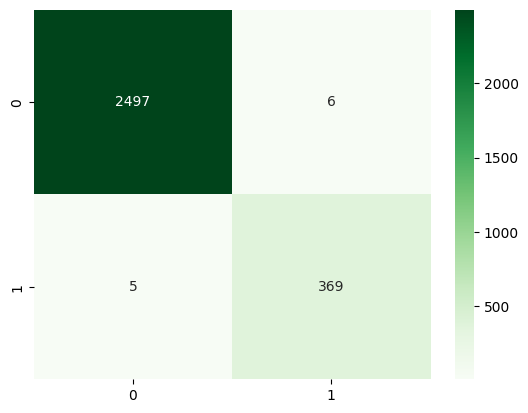

In [92]:
sns.heatmap(cm , cmap = 'Greens', annot = True, fmt = 'd')
plt.show()